In [88]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python import keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.activations import linear, relu

In [89]:
# import and normalize data 
data  = tf.keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = data.load_data()

xtrain = tf.keras.utils.normalize(xtrain, axis = 1)
xtest = tf.keras.utils.normalize(xtest, axis = 1)

In [114]:
# setup the model 
model = Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28, 28)),
        Dense(128, activation = 'relu', name = "L1"),
        Dense(128, activation = 'relu', name = "L2"),
        Dense(128, activation = 'relu', name = "L3"),
        Dense(10)
    ], name = "my_model"
)

In [115]:
# Using Adam optimizer and Categorical Cross entropy for loss
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
) 

In [116]:
# fitting m,odel
model.fit(xtrain, ytrain, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 829us/step - loss: 0.2538
Epoch 2/10
1875/1875 [==============================] - 1s 778us/step - loss: 0.1048
Epoch 3/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.0725
Epoch 4/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.0552
Epoch 5/10
1875/1875 [==============================] - 1s 690us/step - loss: 0.0426
Epoch 6/10
1875/1875 [==============================] - 1s 691us/step - loss: 0.0357
Epoch 7/10
1875/1875 [==============================] - 2s 824us/step - loss: 0.0299
Epoch 8/10
1875/1875 [==============================] - 1s 694us/step - loss: 0.0258
Epoch 9/10
1875/1875 [==============================] - 1s 669us/step - loss: 0.0237
Epoch 10/10
1875/1875 [==============================] - 1s 661us/step - loss: 0.0211


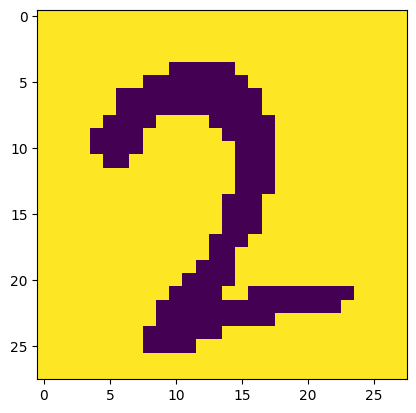

In [139]:
# using the model to predict some digits I wrote 
testimg = cv2.imread('2.png')[:,:,0]
plt.imshow(testimg)
testimg = np.invert(np.array([testimg]))

In [142]:
# returning the value with the highest probability 
prediction = model.predict(testimg)
prediction_p = tf.nn.softmax(prediction)
np.argmax(prediction_p)

1/1 [==============================] - 0s 12ms/step


2

In [141]:
# evalutate the model with the test set
model.evaluate(xtest,ytest)

313/313 [==============================] - 0s 481us/step - loss: 0.0876


0.08762811869382858